<a href="https://colab.research.google.com/github/vickpicco/analistaDeDatos/blob/main/Analista_evidencias_2_y_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Proyecto

Análisis del grado de satisfacción de los usuarios en el funcionamiento de un gestor de reclamos internos: Evaluación basada en métricas de percepción y desempeño durante un período.

Este proyecto busca establecer un modelo de evaluación del grado de satisfacción de los usuarios en el funcionamiento de un gestor de reclamos internos, con el fin de optimizar su desempeño y mejorar la experiencia de los empleados. A través del análisis de datos, se pretende obtener insights que permitan identificar oportunidades de mejora y garantizar una gestión eficiente y transparente de los reclamos dentro de la organización.

## Objetivo principal:

Analizar el grado de satisfacción de los usuarios respecto al funcionamiento del gestor de reclamos internos, mediante la recopilación y procesamiento de datos relevantes, con el propósito de detectar oportunidades de mejora y contribuir a la optimización de la gestión organizacional en un periodo específico.

##Objetivo Específicos:


1.   Recolectar datos sobre la percepción y satisfacción de los usuarios del gestor de reclamos internos mediante encuestas de satisfacción.

2.   Procesar la información obtenida aplicando técnicas de análisis estadístico y exploración de datos para identificar patrones y tendencias.

3.   Identificar áreas de mejora en el funcionamiento del sistema, considerando los puntos críticos señalados por los usuarios.

4.   Proponer estrategias de optimización basadas en los hallazgos del análisis para mejorar la eficiencia del gestor de reclamos internos.

5.   Comunicar los resultados y recomendaciones a la empresa de manera clara y fundamentada para su posible implementación.

## Integrantes del Equipo de Trabajo:



*   Cabrera, Gabriel (GitHub: cjuangab)

*   Pereyra, Hebe. (GitHub: PereyraHebe)

*   Picco, Victoria. (GitHub: vickpicco)

*   Santarena, Florencia. (GitHub: mfsantarena)

*   Suárez, Mariela. (GitHub: MarielarosaSZ)



#EVIDENCIA N°2


#####Creado el notebook, importamos los datos

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/vickpicco/analistaDeDatos/refs/heads/main/Datos/dataset_reclamos_internos_modificado.csv"
df = pd.read_csv(url)
df.head(10)


,Destino del reclamo,Quién lo resolvió,Tipo de reclamo,Fecha del reclamo,Estado del reclamo,Grado de satisfacción
0,INFRAESTRUCTURA,NaN,Actualización de software,NaN,Cerrado,3
1,soporte técnico,NaN,problema de acceso,NaN,Pendiente,0
2,Recursos humanos,Administrador TI,Solicitud de equipo,2024-01-03,resuelto,2
3,Infraestructura,Juan Pérez,Problema de acceso,2024-01-04,EN PROCESO,0
4,S0p0rte técnic0,help desk,Actualización de software,2024-01-05,RESUELTO,5
5,Soporte técnico,juan pérez,Solicitud de equipo,2024/01/06,NaN,0
6,Infraestructura,Administrador TI,ERROR DE SISTEMA,2024-01-07,PENDIENTE,0
7,Recurs0s human0s,SOPORTE NIVEL 1,NaN,2024-01-08,RESUELTO,5
8,Soporte técnico,Help Desk,Error de sistema,2024-01-09,Pendiente,0
9,NaN,ADMINISTRADOR TI,Consulta general,2024-01-10,Pendiente,0


In [ ]:
#Realizamos un pequeño filtrado de los valores igual a "0" porque esos valores son de trabajos no realizados o no terminados
# y no son valores que realmente nos interese analizar
satisfaccion_valida = df['Grado de satisfacción'][(df['Grado de satisfacción'] >= 1) & (df['Grado de satisfacción'] <= 5)]

# Del total de datos, nos quedamos con los validos y su numeracion
total = len(df['Grado de satisfacción'])
validos = satisfaccion_valida.count()
nulos = df['Grado de satisfacción'].isnull().sum()

# Realizamos las medidas de estadicas
media = satisfaccion_valida.mean()
mediana = satisfaccion_valida.median()
desviacion = satisfaccion_valida.std()

# Aca visualizamos los valores
print("Columna: Grado de satisfacción")
print(f"- Valores válidos (1 a 5): {validos} / {total}")
print(f"- Valores ausentes: {nulos}")
print(f"- Media: {media}")
print(f"- Mediana: {mediana}")
print(f"- Desviación estándar: {desviacion}")

Columna: Grado de satisfacción
- Valores válidos (1 a 5): 173 / 400
- Valores ausentes: 0
- Media: 3.005780346820809
- Mediana: 3.0
- Desviación estándar: 1.5192451837067515


In [ ]:
def analizar_columna(col):
    print("Columna:", col)
    print("Categorías únicas:", df[col].nunique(dropna=False))
    print("Cantidad por categoría:")
    print(df[col].value_counts(dropna=False))
    print("Cantidad de nulos:", df[col].isnull().sum())
    print("-" * 40)

analizar_columna("Destino del reclamo")
analizar_columna("Quién lo resolvió")
analizar_columna("Tipo de reclamo")
analizar_columna("Estado del reclamo")

Columna: Destino del reclamo
Categorías únicas: 35
Cantidad por categoría:
Destino del reclamo
Sistemas                31
Recursos humanos        29
Soporte técnico         28
RECURSOS HUMANOS        27
Infraestructura         27
SOPORTE TÉCNICO         25
SISTEMAS                22
Finanzas                21
NaN                     20
INFRAESTRUCTURA         15
soporte técnico         13
sistemas                13
  Finanzas              12
finanzas                12
  Soporte técnico       12
infraestructura         11
FINANZAS                10
  Sistemas               9
recursos humanos         9
  Recursos humanos       8
  Infraestructura        7
  INFRAESTRUCTURA        5
  soporte técnico        4
  finanzas               4
  RECURSOS HUMANOS       4
S0p0rte técnic0          4
Recurs0s human0s         3
s0p0rte técnic0          3
  SOPORTE TÉCNICO        3
  infraestructura        2
  recursos humanos       2
  SISTEMAS               2
  s0p0rte técnic0        1
  S0p0rte técn

 En la variable fecha se analiza cantidad de registros válidos sobre el total, ausentes y mal registrados.


In [ ]:
fecha_valida= df['Fecha del reclamo']
validos_f=fecha_valida.count()
nulos_f=df['Fecha del reclamo'].isnull().sum()
total_f=len(df ["Fecha del reclamo"])
fecha_convertida = pd.to_datetime(df['Fecha del reclamo'], errors='coerce')
mal_registradas = fecha_convertida.isnull().sum() - nulos_f
proporcion = (validos_f/total_f) * 100

# Visualizamos los valores
print("Columna: Fecha de Reclamo")
print(f"- Valores de fecha válidos : {validos_f} / {total_f} = {proporcion}%")
print(f"- Valores de fecha ausentes: {nulos_f}")
print(f"- Valores de fecha Mal Registrados:  {mal_registradas}")

Columna: Fecha de Reclamo
- Valores de fecha válidos : 380 / 400 = 95.0%
- Valores de fecha ausentes: 20
- Valores de fecha Mal Registrados:  92


Conclusiones iniciales

- Se identificaron errores de tipeo y formatos inconsistentes en varias columnas.
- Hay registros con fechas mal formateadas que deberán corregirse.
- Existen valores faltantes y categorías mal escritas (mayúsculas/minúsculas mezcladas).

Estas observaciones orientarán el proceso de limpieza que se realizará en próximas etapas.

# **EVIDENCIA N 3**

En esta evidencia se agrega la columna Dias de resolucion, que contiene una variable cuantitativa, y representa los dias que demoro el reclamo en resolverse desde su generacion hasta llegar al estado cerrado.
Para esta tarea, se utiliza la libreria Pandas y Numpy, solicitando la creacion de datos ramdom en un rango de 7 dias. Luego se ralizara la limpieza de los datos que no correspondan.

In [ ]:
import pandas as pd
import numpy as np

# Se carga el archivo CSV existente en un DataFrame
url = "https://raw.githubusercontent.com/vickpicco/analistaDeDatos/refs/heads/main/Datos/dataset_reclamos_internos_modificado.csv"
df = pd.read_csv(url)

# Se crea los datos para la nueva columna
# Asegúrate de que el número de valores aleatorios coincida con el número de filas en tu DataFrame
num_filas = len(df)
dias_de_resolucion = np.random.randint(1, 8, size=num_filas) # Genera tantos números como filas

#  Se agrega esta nueva columna al DataFrame existente
df['Dias de resolucion'] = dias_de_resolucion

#  Se guarda el DataFrame modificado en el mismo archivo CSV
df.to_csv('dataset_reclamos_internos_modificado.csv', index=False)

#  Se muestra las primeras filas para verificar
print(df.head())

  Destino del reclamo Quién lo resolvió                Tipo de reclamo  \
0     INFRAESTRUCTURA               NaN      Actualización de software   
1     soporte técnico               NaN           problema de acceso     
2    Recursos humanos  Administrador TI          Solicitud de equipo     
3     Infraestructura      Juan Pérez               Problema de acceso   
4     S0p0rte técnic0         help desk    Actualización de software     

  Fecha del reclamo Estado del reclamo  Grado de satisfacción  \
0               NaN          Cerrado                        3   
1               NaN          Pendiente                      0   
2        2024-01-03           resuelto                      2   
3        2024-01-04         EN PROCESO                      0   
4        2024-01-05           RESUELTO                      5   

   Dias de resolucion  
0                   3  
1                   2  
2                   3  
3                   5  
4                   7  


# **DATOS CON FOMATO INCORRECTO**

En el sprint anterior, se pudo observar que las columnas 'Destino del reclamo', 'Quién lo resolvió', 'Tipo de reclamo', 'Fecha del reclamo' y 'Estado del reclamo' contienen datos con formatos incorrectos o inconsistentes. Por lo tanto, se propone a continuación realizar un filtrado de todos los valores posibles en cada una de estas columnas para identificar las variaciones existentes. Posteriormente, se procederá a unificar los valores que, a pesar de sus diferencias de formato o tipeo, representan la misma categoría. Para ello se reutilizara una función creada en la evidencia anterior  'analizar-columna' en cada columna.

# Columna : 'Destino de reclamo'

In [ ]:
#Filtrado de valores posibles de columna destino del reclamo que son todas las areas que se resgistran que han recibido reclamos.
def analizar_columna(col):
    print("Columna:", col)
    print("Categorías únicas:", df[col].nunique(dropna=False))
    print("Cantidad por categoría:")
    print(df[col].value_counts(dropna=False))


analizar_columna("Destino del reclamo")

Columna: Destino del reclamo
Categorías únicas: 35
Cantidad por categoría:
Destino del reclamo
Sistemas                31
Recursos humanos        29
Soporte técnico         28
RECURSOS HUMANOS        27
Infraestructura         27
SOPORTE TÉCNICO         25
SISTEMAS                22
Finanzas                21
NaN                     20
INFRAESTRUCTURA         15
soporte técnico         13
sistemas                13
  Finanzas              12
finanzas                12
  Soporte técnico       12
infraestructura         11
FINANZAS                10
  Sistemas               9
recursos humanos         9
  Recursos humanos       8
  Infraestructura        7
  INFRAESTRUCTURA        5
  soporte técnico        4
  finanzas               4
  RECURSOS HUMANOS       4
S0p0rte técnic0          4
Recurs0s human0s         3
s0p0rte técnic0          3
  SOPORTE TÉCNICO        3
  infraestructura        2
  recursos humanos       2
  SISTEMAS               2
  s0p0rte técnic0        1
  S0p0rte técn

Se observan que en esta columna hay 35 categorias, pero muchas estan repetidas. Se propone 1)Pasar todos los datos a mayuscula.
2) eliminar espacios.

In [ ]:
#Se utiliza str.upper para pasar a mayusculas y str.strip para pasar eliminar espacios
print('Se pasan todos los datos a mayuscula y se quitan espacios')
df['Destino del reclamo'] = df['Destino del reclamo'].str.upper().str.strip()
#Se ejecuta nuevamente la funcion para verificar las categorias
analizar_columna("Destino del reclamo")

print('***************************************************')

#Al observan que hay ceros en vez de la 'o', se reemplazan con str.replace
print('Se reemplzan todos los ceros por letras O')
df['Destino del reclamo'] = df['Destino del reclamo'].str.replace('0', 'O')
#Se ejecuta nuevamente la funcion para verificar las categorias
analizar_columna("Destino del reclamo")



Se pasan todos los datos a mayuscula y se quitan espacios
Columna: Destino del reclamo
Categorías únicas: 8
Cantidad por categoría:
Destino del reclamo
SOPORTE TÉCNICO     85
RECURSOS HUMANOS    79
SISTEMAS            78
INFRAESTRUCTURA     67
FINANZAS            59
NaN                 20
S0P0RTE TÉCNIC0      9
RECURS0S HUMAN0S     3
Name: count, dtype: int64
***************************************************
Se reemplzan todos los ceros por letras O
Columna: Destino del reclamo
Categorías únicas: 6
Cantidad por categoría:
Destino del reclamo
SOPORTE TÉCNICO     94
RECURSOS HUMANOS    82
SISTEMAS            78
INFRAESTRUCTURA     67
FINANZAS            59
NaN                 20
Name: count, dtype: int64


#Resultado: Destino del reclamo

*Se obtienen 5 categorias  y se observan que hay datos ausentes, que se limpiaran en la proxima seccion.*

# Columna : 'Quién lo resolvió'

In [ ]:
#Filtrado de valores posibles de columna Quien lo resolvio que son todas las areas que se resgistran que han recibido reclamos.
def analizar_columna(col):
    print("Columna:", col)
    print("Categorías únicas:", df[col].nunique(dropna=False))
    print("Cantidad por categoría:")
    print(df[col].value_counts(dropna=False))


analizar_columna("Quién lo resolvió")

Columna: Quién lo resolvió
Categorías únicas: 37
Cantidad por categoría:
Quién lo resolvió
Help Desk               36
Juan Pérez              34
JUAN PÉREZ              27
Administrador TI        27
Soporte Nivel 1         26
María López             24
NaN                     20
HELP DESK               17
MARÍA LÓPEZ             15
soporte nivel 1         14
SOPORTE NIVEL 1         14
  Juan Pérez            12
help desk               12
juan pérez              12
ADMINISTRADOR TI        12
maría lópez             12
administrador ti        11
  Soporte Nivel 1       11
  Help Desk              8
  MARÍA LÓPEZ            7
  María López            6
  help desk              6
  ADMINISTRADOR TI       5
  Administrador TI       5
  soporte nivel 1        4
  SOPORTE NIVEL 1        4
S0p0rte Nivel 1          4
  maría lópez            3
  administrador ti       3
  HELP DESK              2
  S0p0rte Nivel 1        1
Administrad0r TI         1
  Administrad0r TI       1
administrad0r ti  

In [ ]:
#Se utiliza str.upper para pasar a mayusculas y str.strip para pasar eliminar espacios
print('Se pasan todos los datos a mayuscula y se quitan espacios')
df['Quién lo resolvió'] = df['Quién lo resolvió'].str.upper().str.strip()

#Se ejecuta nuevamente la funcion para verificar las categorias
analizar_columna("Quién lo resolvió")

print('***************************************************')

#Al observan que hay ceros en vez de la 'o', se reemplazan con str.replace
print('Se reemplzan todos los ceros por letras O')
df['Quién lo resolvió'] = df['Quién lo resolvió'].str.replace('0', 'O')
#Se ejecuta nuevamente la funcion para verificar las categorias
analizar_columna("Quién lo resolvió")

Se pasan todos los datos a mayuscula y se quitan espacios
Columna: Quién lo resolvió
Categorías únicas: 8
Cantidad por categoría:
Quién lo resolvió
JUAN PÉREZ          86
HELP DESK           81
SOPORTE NIVEL 1     73
MARÍA LÓPEZ         67
ADMINISTRADOR TI    63
NaN                 20
S0P0RTE NIVEL 1      6
ADMINISTRAD0R TI     4
Name: count, dtype: int64
***************************************************
Se reemplzan todos los ceros por letras O
Columna: Quién lo resolvió
Categorías únicas: 6
Cantidad por categoría:
Quién lo resolvió
JUAN PÉREZ          86
HELP DESK           81
SOPORTE NIVEL 1     79
ADMINISTRADOR TI    67
MARÍA LÓPEZ         67
NaN                 20
Name: count, dtype: int64


#Resultado: Columna: Quién lo resolvió

*Se obtienen 5 categorias  y se observan que hay datos ausentes, que se limpiaran en la proxima seccion.*

# Columna: Tipo de recamo

Se realizó el análisis y la corrección. No se subió al repositorio en el momento pero sí modificó el archivo original. Al refrescar el repositorio con lo trabajado por la compañera Hebe, no es posible mostrar ese proceso. Se muestra el resultado.

In [ ]:
#Se utiliza str.upper para pasar a mayusculas y str.strip para pasar eliminar espacios
print('Se pasan todos los datos a mayuscula y se quitan espacios')
df['Tipo de reclamo'] = df['Tipo de reclamo'].str.upper().str.strip()

#Se ejecuta nuevamente la funcion para verificar las categorias
analizar_columna("Tipo de reclamo")

print('***************************************************')

#Al observan que hay ceros en vez de la 'o', se reemplazan con str.replace
print('Se reemplzan todos los ceros por letras O')
df['Tipo de reclamo'] = df['Tipo de reclamo'].str.replace('0', 'O')
#Se ejecuta nuevamente la funcion para verificar las categorias

analizar_columna("Tipo de reclamo")
analizar_columna("Tipo de reclamo")

Se pasan todos los datos a mayuscula y se quitan espacios
Columna: Tipo de reclamo
Categorías únicas: 11
Cantidad por categoría:
Tipo de reclamo
CONSULTA GENERAL             80
PROBLEMA DE ACCESO           76
ERROR DE SISTEMA             71
ACTUALIZACIÓN DE SOFTWARE    69
SOLICITUD DE EQUIPO          67
NaN                          20
ERR0R DE SISTEMA              7
C0NSULTA GENERAL              4
ACTUALIZACIÓN DE S0FTWARE     3
S0LICITUD DE EQUIP0           2
PR0BLEMA DE ACCES0            1
Name: count, dtype: int64
***************************************************
Se reemplzan todos los ceros por letras O
Columna: Tipo de reclamo
Categorías únicas: 6
Cantidad por categoría:
Tipo de reclamo
CONSULTA GENERAL             84
ERROR DE SISTEMA             78
PROBLEMA DE ACCESO           77
ACTUALIZACIÓN DE SOFTWARE    72
SOLICITUD DE EQUIPO          69
NaN                          20
Name: count, dtype: int64
Columna: Tipo de reclamo
Categorías únicas: 6
Cantidad por categoría:
Tipo de r

# Resultado Columna: Tipo de reclamo

*Se observan 5 categorías válidas. Las nulas se limpiarán en la próxima sección*

# Columna: Estado del reclamo

Al igual que las columnas anteriores se analizan el formato que tienen los datos, se unifica pasando todo a mayúscula y se observa que hay ceros (0) en lugar de oes (O) por lo que se procede a reemplazarlos.

In [ ]:
analizar_columna("Estado del reclamo")


Columna: Estado del reclamo
Categorías únicas: 32
Cantidad por categoría:
Estado del reclamo
Pendiente         45
Cerrado           38
En proceso        35
Resuelto          28
EN PROCESO        27
PENDIENTE         23
RESUELTO          21
NaN               20
CERRADO           20
resuelto          17
  PENDIENTE       13
  Cerrado         12
  RESUELTO        12
pendiente         12
cerrado           11
en proceso        10
  En proceso       7
En pr0ces0         6
  CERRADO          5
  Resuelto         5
Resuelt0           5
  Pendiente        5
  pendiente        4
  EN PROCESO       3
en pr0ces0         3
Cerrad0            3
  cerrado          3
  En pr0ces0       3
  resuelto         1
  cerrad0          1
  en proceso       1
  Cerrad0          1
Name: count, dtype: int64


In [ ]:
print('Se pasan todos los datos a mayuscula y se quitan espacios')
df['Estado del reclamo'] = df['Estado del reclamo'].str.upper().str.strip()

analizar_columna("Estado del reclamo")

print('***************************************************')

print('Se reemplzan todos los ceros por letras O')
df['Estado del reclamo'] = df['Estado del reclamo'].str.replace('0', 'O')

analizar_columna("Estado del reclamo")

Se pasan todos los datos a mayuscula y se quitan espacios
Columna: Estado del reclamo
Categorías únicas: 8
Cantidad por categoría:
Estado del reclamo
PENDIENTE     102
CERRADO        89
RESUELTO       84
EN PROCESO     83
NaN            20
EN PR0CES0     12
CERRAD0         5
RESUELT0        5
Name: count, dtype: int64
***************************************************
Se reemplzan todos los ceros por letras O
Columna: Estado del reclamo
Categorías únicas: 5
Cantidad por categoría:
Estado del reclamo
PENDIENTE     102
EN PROCESO     95
CERRADO        94
RESUELTO       89
NaN            20
Name: count, dtype: int64


# Resultado Columna: Estado del reclamo

*Quedan bien identificados los estados posibles. Los valores nulos serán limpiados en la prósima seccón*

# Columna : Fecha de reclamo.

En la evidencia dos, se analizó esta columna en la siguiente celda: https://colab.research.google.com/drive/1ZOsXAIi3QDvm6AqHDUCxa9w4jRr5Sp7X#scrollTo=Dnj0CjIKncqW&line=1&uniqifier=1

Allí se observa que hay 92 datos mal registrados (error de formato).

Además de los datos de formato incorrecto, se desea formatear todas las fechas de formato 'm/d/y' a formato 'y/m/d'.

Conocemos que los registros de fechas datan desde el 1/1/2024 al 3/2/2025 inclusive.

Tras observar el dataset, se interpreta que las fechas son consecutivas y los registros corresponden a uno por día, por lo que se corregirán los datos nulos en la siguiente sección.

In [ ]:


# Primero intentamos pasar los datos de la columna 'Fecha del reclamo' a datetime usando format='mixed' para cualquier formato que tengan

df['Fecha del reclamo'] = pd.to_datetime(df['Fecha del reclamo'], format='mixed', errors='coerce')

# Ahora corroboramos las fechas que siguen con formato incorrecto (convertidas a NaT)
fechas_mal_formateadas = df[df['Fecha del reclamo'].isnull()]

# Mostramos que las fechas que no pudieron ser convertidas son las de valor null
print("Fechas que aún tienen formato incorrecto después de usar format='mixed':")
print(fechas_mal_formateadas['Fecha del reclamo'])



Fechas que aún tienen formato incorrecto después de usar format='mixed':
0     NaT
1     NaT
46    NaT
116   NaT
128   NaT
160   NaT
173   NaT
186   NaT
190   NaT
197   NaT
208   NaT
213   NaT
225   NaT
276   NaT
304   NaT
320   NaT
321   NaT
324   NaT
343   NaT
356   NaT
Name: Fecha del reclamo, dtype: datetime64[ns]


# Resultado Columna: fecha del reclamo.

Se limpiaron los 92 datos con formato incorrecto detectados en la evidencia 2. Los datos ausentes seran evaluados en la proxima seccion.

# ***DATOS AUSENTES***

Para visualizar y tener conocimiento de los datos ausentes, se utilizará el método isnull de Pandas. Como no podremos visualizar la totalidad de datos, sumaremos los valores True de cada columna para tener referencia de la cantidad de datos nulos obtenidos en cada columna, y así evaluar cómo proseguir.

In [ ]:
#Vamos a visualizar los datos nullos o ausentes
#False=no nulo y True= nulo
nulos_df = df.isnull()
print(nulos_df)

     Destino del reclamo  Quién lo resolvió  Tipo de reclamo  \
0                  False               True            False   
1                  False               True            False   
2                  False              False            False   
3                  False              False            False   
4                  False              False            False   
..                   ...                ...              ...   
395                False              False            False   
396                False              False            False   
397                False              False            False   
398                 True              False            False   
399                False              False            False   

     Fecha del reclamo  Estado del reclamo  Grado de satisfacción  \
0                 True               False                  False   
1                 True               False                  False   
2                False  

In [ ]:
#Sumamos la cantidad de valores nulos por cada columna del dataframe
nulos_por_columna = nulos_df.sum()
print("\nCantidad de valores nulos por columna:")
print(nulos_por_columna)


Cantidad de valores nulos por columna:
Destino del reclamo      20
Quién lo resolvió        20
Tipo de reclamo          20
Fecha del reclamo        20
Estado del reclamo       20
Grado de satisfacción     0
Dias de resolucion        0
dtype: int64


Como se puede observar, las columnas destino de reclamo tiene 20 datos nulos, quien lo resolvió tiene 20 datos nulos, tipo de reclamo tiene 20 datos nulos y fecha de reclamo tiene 20 datos nulos y estado del reclamo tambien tiene 20 datos nulos, en tanto las columnas grado de sastifacción y dias de resolución no poseen valores nulos

# **Limpieza de datos nulos**

---



In [ ]:

#Reemplazar espacios vacíos por NaN en las primeras tres columnas
cols_to_fill = df.columns[:3]
df[cols_to_fill] = df[cols_to_fill].replace(r'^\s*$', np.nan, regex=True)

#Rellenar los datos nulos o vacios con la moda de cada columna
for col in cols_to_fill:
    moda = df[col].mode().iloc[0]
    df[col] = df[col].fillna(moda)

#Convertir la columna de fechas a datetime
df['Fecha del reclamo'] = pd.to_datetime(df['Fecha del reclamo'], errors='coerce')

#Rellenamos de forma manual las dos primeras fechas dado que era dificultoso realizarlo de forma automatica
if pd.isna(df.loc[0, 'Fecha del reclamo']):
    df.loc[0, 'Fecha del reclamo'] = pd.Timestamp('2024-01-01')
if pd.isna(df.loc[1, 'Fecha del reclamo']):
    df.loc[1, 'Fecha del reclamo'] = pd.Timestamp('2024-01-02')

# Rellenar fechas faltantes a partir de la fila 2 con el patron que siguen
# tomando como referencia la fecha de la fila anterior
for i in range(2, len(df)):
    if pd.isna(df.loc[i, 'Fecha del reclamo']):
        df.loc[i, 'Fecha del reclamo'] = df.loc[i - 1, 'Fecha del reclamo'] + pd.Timedelta(days=1)


df.head(400)

,Destino del reclamo,Quién lo resolvió,Tipo de reclamo,Fecha del reclamo,Estado del reclamo,Grado de satisfacción,Dias de resolucion
0,INFRAESTRUCTURA,JUAN PÉREZ,ACTUALIZACIÓN DE SOFTWARE,2024-01-01,CERRADO,3,3
1,SOPORTE TÉCNICO,JUAN PÉREZ,PROBLEMA DE ACCESO,2024-01-02,PENDIENTE,0,2
2,RECURSOS HUMANOS,ADMINISTRADOR TI,SOLICITUD DE EQUIPO,2024-01-03,RESUELTO,2,3
3,INFRAESTRUCTURA,JUAN PÉREZ,PROBLEMA DE ACCESO,2024-01-04,EN PROCESO,0,5
4,SOPORTE TÉCNICO,HELP DESK,ACTUALIZACIÓN DE SOFTWARE,2024-01-05,RESUELTO,5,7
...,...,...,...,...,...,...,...
395,FINANZAS,ADMINISTRADOR TI,CONSULTA GENERAL,2025-01-30,CERRADO,5,2
396,SOPORTE TÉCNICO,SOPORTE NIVEL 1,CONSULTA GENERAL,2025-01-31,PENDIENTE,0,6
397,SOPORTE TÉCNICO,HELP DESK,SOLICITUD DE EQUIPO,2025-02-01,EN PROCESO,0,7
398,SOPORTE TÉCNICO,HELP DESK,CONSULTA GENERAL,2002-02-25,RESUELTO,3,5


# Limpieza de datos **nulos**

Como se puede observar limpiamos los espacios nulos o vacios siguiendo como
criterio unificado para las variables cuantitativas de "Destino del reclamo", "Quien lo resolvio" y "Tipo de reclamo" el suplantar esos datos vacios por la moda de cada columna, ya que no son datos criticos y permiten realizar un estudio de los mismos.

Asi tambien observamos un patron en cuanto a las fechas de los reclamos, donde los reclamos resultan ser uno por dia desde el primero de enero del 2024, por lo cual decidimos remplazar los datos faltantes con las fechas correspondientes, no cambiamos el formato de fecha dado que el formato csv sigue el estandar *ISO 8601* para el procesamiendo de los mismos.

# VERIFICAR DATOS REPETIDOS

In [ ]:
# Aqui verificamos si existe alguna fila que este repetida
#creando una serie donde almacena un True por cada fila repetida
duplicados = df[df.duplicated(keep=False)]

# Mostrar los duplicados si existen
print(f"Cantidad de filas duplicadas: {duplicados.shape[0]}")
duplicados

Cantidad de filas duplicadas: 0


,Destino del reclamo,Quién lo resolvió,Tipo de reclamo,Fecha del reclamo,Estado del reclamo,Grado de satisfacción,Dias de resolucion




---
Como podemos visualizar no tenemos datos repetidos, para nosotros un dato repetido es cuando toda la fila completa esta repetida, dado que con que difiera un solo dato de cada fila ya hace que sea un reclamo totalmente diferente, los reclamos pueden compartir sector, personal asignado, incluso calificacion, pero despues de analizar llegamos a la conclusion que no hay dato repetido.


---




# **Datos erroneos**

Para verificar datos erroneos, nos adentramos a analizar el funcionamineto GRI, Gestor de Reclamos Internos. Se determina para cada columna, criterios respaldados por la documentacion registrada. Recorreremos las variables de cada columna que esten relacionadas, para verificar la congruencia de los datos. La finalidad es detectar datos inconsistentes , de ser posible, se suplantaran, de lo contrario seran desestimados.


LIMPIEZA DE VARIABLES CUANTITATIVAS

* Dias de Resolucion y estado de reclamo: como se determino anteriormente, esta
columnaesta relacionada con  estado del reclamo, Si contiene valor , el estado deberia estar cerrado

* Grado de satisfaccion y estado del reclamo: como se determino anteriormente, esta columna esta relacionada con estado del reclamo, si contiene valor, el estado deberia estar cerrado.

*  **Destino de reclamo y Quien lo resolvio**: se observan algunas inconsistenacias, pero no tenemos documentacion sufciciente para hacer las correcciones, y se considera que la relacion de estas variables no son indispensables para la evaluacion del grado de satisfaccion.

*  **Destino del reclamo y tipo de reclamo**: aunque se desconoce con exactidud el criterio del GRI, se aplicara un criterio basado en el disernimiento y buen juicio del equipo. El siguiente se detalla a continuacion:




**AREAS**                   /                    **TIPO DE RECLAMO**

*SOPORTE TÉCNICO* : PROBLEMA DE ACCESO

*SISTEMAS*: ACTUALIZACIÓN DE SOFTWARE

*INFRAESTRUCTURA* :ERROR DE SISTEMA

*RECURSOS HUMANOS*: SOLICITUD DE EQUIPO

*FINANZAS* : CONSULTA GENERAL


In [ ]:

# PRIMER FILTRO: ANTES DE LA LIMPIEZA PARA VERIFICAR CUANTOS DATOS ERRONEOS TENEMOS EN AREAS DE RRHH y FINANZAS


criterio_correspondencia_inicial = {
    'RECURSOS HUMANOS': ['SOLICITUD DE EQUIPO', 'CONSULTA GENERAL'],
    'FINANZAS': ['CONSULTA GENERAL']
}

# Esta funcion identifica las filas donde el 'Tipo de reclamo' no corresponde con el criterio asignado a cada area

filas_no_correspondientes_inicial_rrh_finanzas = df[
    (df['Destino del reclamo'].isin(['RECURSOS HUMANOS', 'FINANZAS'])) &
    (df.apply(
        lambda row: row['Tipo de reclamo'] not in criterio_correspondencia_inicial.get(row['Destino del reclamo'], []),
        axis=1
    ))
]

# Aqui contamos la cantidad de datos no correspondientes en RRHH y Finanzas ANTES de la limpieza
cantidad_no_correspondientes_inicial_rrh_finanzas = len(filas_no_correspondientes_inicial_rrh_finanzas)
print(f"Cantidad de datos no correspondientes en 'Tipo de reclamo' para RRHH y Finanzas ANTES de la limpieza: {cantidad_no_correspondientes_inicial_rrh_finanzas}")


# Limpeza de RRHH y Finanzas, para ello asignaremos los datos que corresponden al criterio en cada cariable segun corresponda.

# Asignar solicitud de empleo donde 'Destino del reclamo' sea 'RECURSOS HUMANOS'
df.loc[df['Destino del reclamo'] == 'RECURSOS HUMANOS', 'Tipo de reclamo'] = 'SOLICITUD DE EQUIPO'

# Asignar 'CONSULTA GENERAL'donde 'Destino del reclamo' sea 'FINANZAS'
df.loc[df['Destino del reclamo'] == 'FINANZAS', 'Tipo de reclamo'] = 'CONSULTA GENERAL'

# Verificacion de la limpieza: aplicamos un segundo filtro, esperamos que el conteo de las filas que no corresponden sea cero.

criterio_correspondencia_despues_limpieza = {
    'RECURSOS HUMANOS': ['SOLICITUD DE EQUIPO'],
    'FINANZAS': ['CONSULTA GENERAL']
}

filas_no_correspondientes_despues_limpieza_rrh_finanzas = df[
    (df['Destino del reclamo'].isin(['RECURSOS HUMANOS', 'FINANZAS'])) &
    (df.apply(
        lambda row: row['Tipo de reclamo'] not in criterio_correspondencia_despues_limpieza.get(row['Destino del reclamo'], []),
        axis=1
    ))
]

# Se imprime resultado
cantidad_no_correspondientes_despues_limpieza_rrh_finanzas = len(filas_no_correspondientes_despues_limpieza_rrh_finanzas)
print(f"Cantidad de datos no correspondientes en 'Tipo de reclamo' para RRHH y Finanzas DESPUÉS de la limpieza: {cantidad_no_correspondientes_despues_limpieza_rrh_finanzas}")


Cantidad de datos no correspondientes en 'Tipo de reclamo' para RRHH y Finanzas ANTES de la limpieza: 0
Cantidad de datos no correspondientes en 'Tipo de reclamo' para RRHH y Finanzas DESPUÉS de la limpieza: 0


**Se repite el proceso anterior con las areas restantes.**

In [ ]:

# PRIMER FILTRO: ANTES DE LA LIMPIEZA PARA VERIFICAR CUANTOS DATOS ERRONEOS TENEMOS  AREAS SOPORTE TECNICO, SISTEMAS E INFRAESTRUCTURA
criterio_correspondencia_otras_areas_inicial = {
    'SOPORTE TÉCNICO': ['PROBLEMA DE ACCESO'],
    'SISTEMAS': [ 'ACTUALIZACIÓN DE SOFTWARE'],
    'INFRAESTRUCTURA': ['ERROR DE SISTEMA']
}


# Esta funcion identifica las filas donde el 'Tipo de reclamo' no corresponde con el criterio asignado a cada area
filas_no_correspondientes_otras_areas_inicial = df[
    (df['Destino del reclamo'].isin(['SOPORTE TÉCNICO', 'SISTEMAS', 'INFRAESTRUCTURA'])) &
    (df.apply(
        lambda row: row['Tipo de reclamo'] not in criterio_correspondencia_otras_areas_inicial.get(row['Destino del reclamo'], []),
        axis=1
    ))
]

# Mostrar la cantidad de datos no correspondientes en las otras áreas ANTES de la limpieza
cantidad_no_correspondientes_otras_areas_inicial = len(filas_no_correspondientes_otras_areas_inicial)
print(f"Cantidad de datos no correspondientes en 'Tipo de reclamo' para Soporte Técnico, Sistemas, Infraestructura ANTES de la limpieza: {cantidad_no_correspondientes_otras_areas_inicial}")

# Limpeza de Soporte Técnico, Sistemas, Infraestructura , para ello asignaremos los datos que corresponden al criterio en cada Variable segun corresponda.

# Asignar solicitud de empleo donde 'Destino del reclamo' sea 'SOPORTE TÉCNICO'
df.loc[df['Destino del reclamo'] == 'SOPORTE TÉCNICO', 'Tipo de reclamo'] = 'PROBLEMA DE ACCESO'

# Asignar 'CONSULTA GENERAL'donde 'Destino del reclamo' sea 'SISTEMAS'
df.loc[df['Destino del reclamo'] == 'SISTEMAS', 'Tipo de reclamo'] = 'ACTUALIZACIÓN DE SOFTWARE'

# Asignar 'CONSULTA GENERAL'donde 'Destino del reclamo' sea 'SISTEMAS'
df.loc[df['Destino del reclamo'] == 'INFRAESTRUCTURA', 'Tipo de reclamo'] = 'ERROR DE SISTEMA'

# Verificacion de la limpieza: aplicamos un segundo filtro, esperamos que el conteo de las filas que no corresponden sea cero.

criterio_correspondencia_despues_limpieza = {
    'SOPORTE TÉCNICO': ['PROBLEMA DE ACCESO'],
    'SISTEMAS': [ 'ACTUALIZACIÓN DE SOFTWARE'],
    'INFRAESTRUCTURA': ['ERROR DE SISTEMA']
}

filas_no_correspondientes_despues_limpieza = df[
    (df['Destino del reclamo'].isin([ 'SOPORTE TÉCNICO', 'SISTEMAS','INFRAESTRUCTURA' ])) &
    (df.apply(
        lambda row: row['Tipo de reclamo'] not in criterio_correspondencia_despues_limpieza.get(row['Destino del reclamo'], []),
        axis=1
    ))
]

# Se imprime resultado
# Corregido el nombre de la variable y el texto del print para reflejar las áreas correctas
cantidad_no_correspondientes_despues_limpieza_otras_areas = len(filas_no_correspondientes_despues_limpieza)
print(f"Cantidad de datos no correspondientes en Soporte Técnico, Sistemas, Infraestructura DESPUÉS de la limpieza: {cantidad_no_correspondientes_despues_limpieza_otras_areas}")


Cantidad de datos no correspondientes en 'Tipo de reclamo' para Soporte Técnico, Sistemas, Infraestructura ANTES de la limpieza: 215
Cantidad de datos no correspondientes en Soporte Técnico, Sistemas, Infraestructura DESPUÉS de la limpieza: 0


**Observaciones:**

Este proceso fue realizado porque los datos erroneos superaban un 10 %  del total de datos. Como se hablo en clases, en un caso real, no podriamos continuar con el analisis. Estos criterios fueron definidos en forma grupal, y este codigo fue investigado en documentacion proporcionada por el docente, y corregido por un asistente de inteligencia artificial, para poder continuar el flujo de la evidencia.

# Variables cuantitativas:

LIMPIEZA DE ESTADO DE RECLAMO CON RESPECTO VARIABLES CUANTITATIVAS

Días de Resolución y Estado del reclamo:

Como se determinó anteriormente, la columna Días de Resolución está relacionada con  Estado del reclamo. Si aquella contiene un valor, el estado debería ser CERRADO

Igualmente, la columna Grado de satisfaccion está relacionada con Estado del reclamo, si aquella contiene valor, el estado deberia ser CERRADO.

In [ ]:
# Verificar datos donde 'Dias de resolucion' tiene valor pero el estado NO es 'CERRADO'
# Y Contar filas donde 'Dias de resolucion' NO es nulo Y 'Estado del reclamo' NO es 'CERRADO'
filas_con_dias_sin_cerrar = df[
    (df['Dias de resolucion'].notna()) &
    (df['Estado del reclamo'] != 'CERRADO')
]

cantidad_con_dias_sin_cerrar = len(filas_con_dias_sin_cerrar)
print(f"Cantidad de filas con 'Dias de resolucion' pero estado NO 'CERRADO': {cantidad_con_dias_sin_cerrar}")

#REPETIMOS EL PROCEDIMIENTO PARA GRADO DESATISFACCION
# Verificar datos donde 'Grado de satisfacción' tiene valor pero el estado NO es 'CERRADO'
# Contar filas donde 'Grado de satisfacción' NO es nulo Y 'Estado del reclamo' NO es 'CERRADO'
filas_con_calificacion_sin_cerrar = df[
    (df['Grado de satisfacción'].notna()) &
    (df['Estado del reclamo'] != 'CERRADO')
]

cantidad_con_calificacion_sin_cerrar = len(filas_con_calificacion_sin_cerrar)
print(f"Cantidad de filas con 'Grado de satisfacción' pero estado NO 'CERRADO': {cantidad_con_calificacion_sin_cerrar}")


# Limpieza para corregir 'Estado del reclamo'

# Identificar las filas con logica donde:('Dias de resolucion' tiene valor) O ('Grado de satisfacción' tiene valor Y es mayor que 0)
# Y donde el 'Estado del reclamo' NO es 'CERRADO'
condicion_corregir_estado = (
    (df['Dias de resolucion'].notna()) |  # Si Dias de resolucion tiene valor
    ((df['Grado de satisfacción'].notna()) & (df['Grado de satisfacción'] > 0)) # O si Grado de satisfacción tiene valor Y es mayor que 0
) & (df['Estado del reclamo'] != 'CERRADO') # Y el estado actual es diferente de CERRADO

# Para las filas que cumplen la condición, establecer el 'Estado del reclamo' a 'CERRADO'
df.loc[condicion_corregir_estado, 'Estado del reclamo'] = 'CERRADO'




Cantidad de filas con 'Dias de resolucion' pero estado NO 'CERRADO': 306
Cantidad de filas con 'Grado de satisfacción' pero estado NO 'CERRADO': 306


**VERIFICACIÓN DE VARIABLES CUANTITATIVAS**

Se analizan:** GRADO DE SATISFACCIÓN Y DÍAS DE RESOLUCIÓN**

In [ ]:
print("\nDataFrame después de las correcciones:")
print(df.head())

# Contar los reclamos que están "CERRADO" pero que tienen el 'Grado de satisfacción' nulo o 0
reclamos_cerrados_sin_calificacion = df[
    (df['Estado del reclamo'] == 'CERRADO') &
    ((df['Grado de satisfacción'].isnull()) | (df['Grado de satisfacción'] == 0))
]

cantidad_cerrados_sin_calificacion = len(reclamos_cerrados_sin_calificacion)

print(f"Cantidad de reclamos CERRADOS sin 'Grado de satisfacción' (0): {cantidad_cerrados_sin_calificacion}")



DataFrame después de las correcciones:
  Destino del reclamo Quién lo resolvió      Tipo de reclamo  \
0     INFRAESTRUCTURA        JUAN PÉREZ     ERROR DE SISTEMA   
1     SOPORTE TÉCNICO        JUAN PÉREZ   PROBLEMA DE ACCESO   
2    RECURSOS HUMANOS  ADMINISTRADOR TI  SOLICITUD DE EQUIPO   
3     INFRAESTRUCTURA        JUAN PÉREZ     ERROR DE SISTEMA   
4     SOPORTE TÉCNICO         HELP DESK   PROBLEMA DE ACCESO   

  Fecha del reclamo Estado del reclamo  Grado de satisfacción  \
0        2024-01-01            CERRADO                      3   
1        2024-01-02            CERRADO                      0   
2        2024-01-03            CERRADO                      2   
3        2024-01-04            CERRADO                      0   
4        2024-01-05            CERRADO                      5   

   Dias de resolucion  
0                   3  
1                   2  
2                   3  
3                   5  
4                   7  
Cantidad de reclamos CERRADOS sin 'Grado

In [ ]:
# Filtra los reclamos que están cerrados y tienen 0 días de resolución
reclamos_cerrados_dias_cero = df[
    (df['Estado del reclamo'] == 'CERRADO') &
    (df['Dias de resolucion'] == 0)
]

# Muestra la cantidad de reclamos encontrados
cantidad_cerrados_dias_cero = len(reclamos_cerrados_dias_cero)

print(f"Cantidad de reclamos CERRADOS con 0 días de resolución: {cantidad_cerrados_dias_cero}")

# Opcional: Mostrar los reclamos encontrados
print("\nReclamos CERRADOS con 0 días de resolución:")
print(reclamos_cerrados_dias_cero)

Cantidad de reclamos CERRADOS con 0 días de resolución: 0

Reclamos CERRADOS con 0 días de resolución:
Empty DataFrame
Columns: [Destino del reclamo, Quién lo resolvió, Tipo de reclamo, Fecha del reclamo, Estado del reclamo, Grado de satisfacción, Dias de resolucion]
Index: []


**Conclucion**

Tras limpiar los datos erroneos, verificamos la columna de grado de satisfaccion, nos encontramos con valores de 0 para reclamos cerrados. Se determina que estos datos no son erroneos, sino que en estos casos los usuarios se abstuvieron de emitir opnion.

En el caso de la columna dias de resolucion, se determino, que al contener dias de resolucion, el estado deberia a cambiar a cerrado. No se detectan casos Cerrados sin dias de resolucion, por lo que se verifica que los datos estan correctos.

# **CONSIGNA 2**

 En cuanto al uso de la librería MatPlotLib se propone realizar al menos 4 gráficos que guarden relación con los datos. Como por ejemplo, realizar los gráficos que correspondan según las variables analizadas.  
Por ejemplo puede usar uno tipo torta para reflejar los porcentajes dentro de una variable categórica. Los gráficos deben estar correctamente etiquetados para que se pueda observar los datos que reflejan.




**Que area tiene mejor puntuacion en satisfaccion en un periodo determinado**

Elegimos el mes de diciembre para evaluar al area mejor puntuada.

Para ello, necesitamos filtrar los reclamos del mes de diciembre, que tengan calificacion entre 1 y 5.
luego debemos saber el promedio del grado de satisfaccion de cada area. Luego construimos el grafico de puntos para representar.

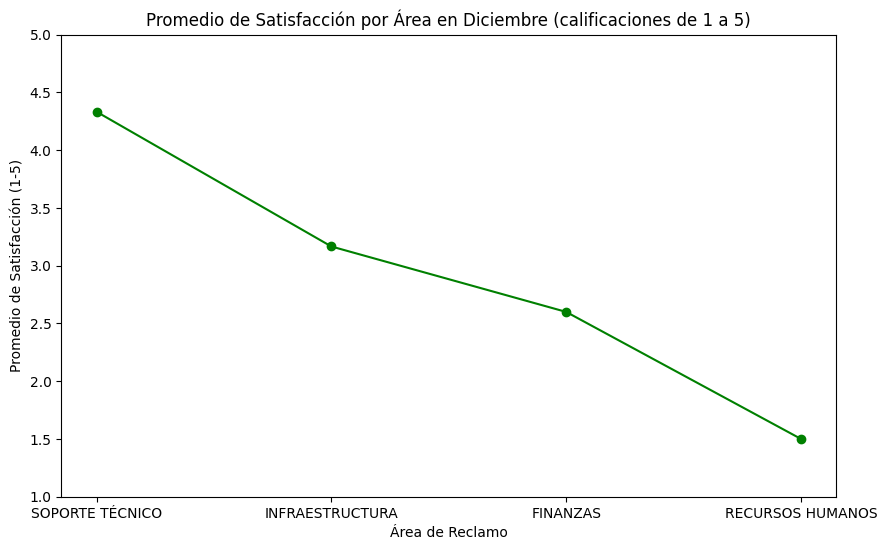


El área con el mejor promedio de satisfacción (1-5) en Diciembre es 'SOPORTE TÉCNICO' con un promedio de 4.33


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtramos los reclamos del mes de diciembre

reclamos_diciembre = df[df['Fecha del reclamo'].dt.month == 12].copy()

# 1-Tomamos los reclamos de diciembre con calificación de 1 a 5
# 2-Agrupar por 'Destino del reclamo' y calcular el promedio del 'Grado de satisfaccion'


satisfaccion_diciembre_evaluada = reclamos_diciembre[(reclamos_diciembre['Grado de satisfacción'] >= 1) & (reclamos_diciembre['Grado de satisfacción'] <= 5)].copy()

calificacion_por_area_diciembre = satisfaccion_diciembre_evaluada.groupby('Destino del reclamo')['Grado de satisfacción'].mean().reset_index()

# colocamos nombres las columnas para ser mas claros en el grafico

calificacion_por_area_diciembre.columns = ['Área de Reclamo', 'Promedio de Satisfacción (1-5) en Diciembre']

# Ordenamos por promedio de satisfacción en orden descendente para el gráfico
calificacion_por_area_diciembre_ordenada = calificacion_por_area_diciembre.sort_values(by='Promedio de Satisfacción (1-5) en Diciembre', ascending=False)

# Gráfico de puntos
plt.figure(figsize=(10, 6))
plt.plot(calificacion_por_area_diciembre_ordenada['Área de Reclamo'], calificacion_por_area_diciembre_ordenada['Promedio de Satisfacción (1-5) en Diciembre'], 'o-', color='green')

# Configuracion del gráfico
plt.xlabel('Área de Reclamo')
plt.ylabel('Promedio de Satisfacción (1-5)')
plt.title('Promedio de Satisfacción por Área en Diciembre (calificaciones de 1 a 5)')
plt.ylim(1, 5) # Rango del eje Y para reflejar la escala de satisfacción
plt.show()#MOSTRAR GRAFICO

# Observacion.
mejor_area_diciembre = calificacion_por_area_diciembre_ordenada.iloc[0]
print(f"\nEl área con el mejor promedio de satisfacción (1-5) en Diciembre es '{mejor_area_diciembre['Área de Reclamo']}' con un promedio de {mejor_area_diciembre['Promedio de Satisfacción (1-5) en Diciembre']:.2f}")

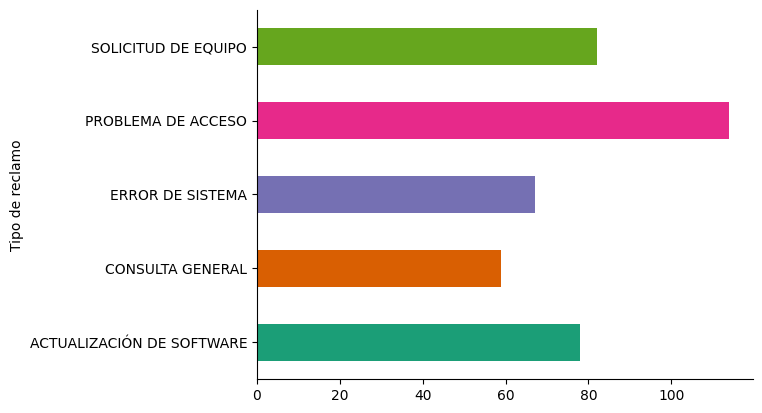

In [ ]:
# @title Tipo de reclamo

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tipo de reclamo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Analisis Mensual de Areas responsable de cada reclamo

---



Decidimos analizar como se distribuyen los reclamos mensualmente en cada area para ver si existe alguna tendencia.
Para ellos establecemos un rango de fechas, y filtramos con la intencion de eliminar datos erroneos.

<ipython-input-22-1929e817e271>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Mes'] = df_filtrado['Fecha del reclamo'].dt.to_period('M').dt.to_timestamp()


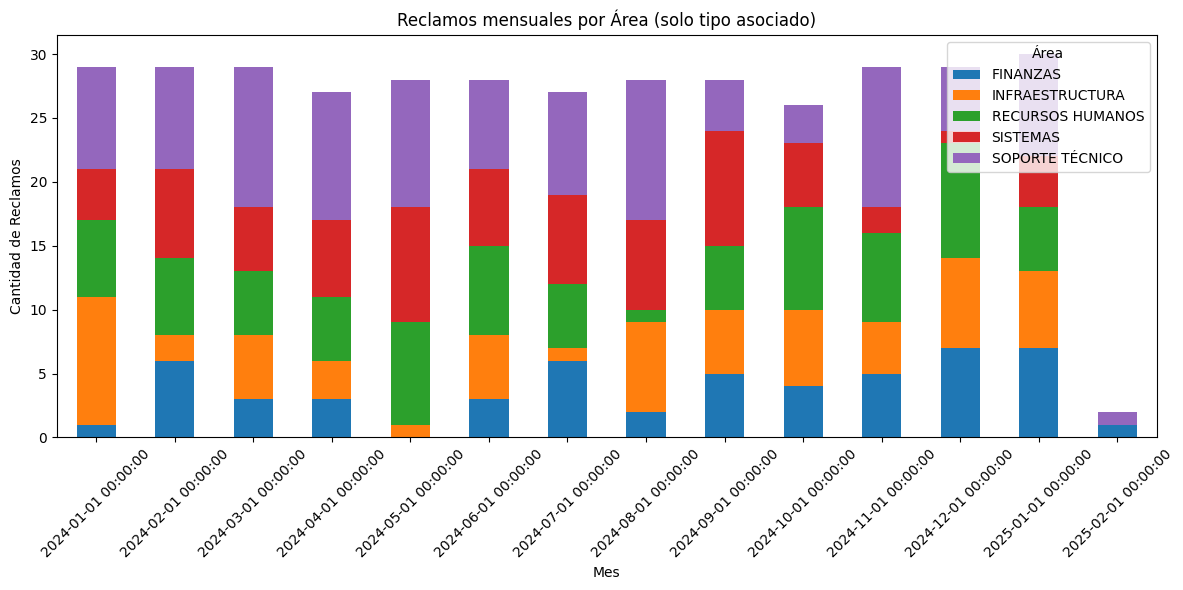

In [ ]:

df['Fecha del reclamo'] = pd.to_datetime(df['Fecha del reclamo'])

# Filtrar por rango de fechas
fecha_inicio = '2024-01-01'
fecha_fin = '2025-02-03'

df_filtrado = df[(df['Fecha del reclamo'] >= fecha_inicio) & (df['Fecha del reclamo'] <= fecha_fin)]

# Crear columna de mes
df_filtrado['Mes'] = df_filtrado['Fecha del reclamo'].dt.to_period('M').dt.to_timestamp()

mensual_area = df_filtrado.groupby(['Mes', 'Destino del reclamo']).size().unstack(fill_value=0)

# Diccionario con las relaciones válidas entre Área y Tipo de reclamo
relaciones_validas = {
    "SOPORTE TÉCNICO": "PROBLEMA DE ACCESO",
    "SISTEMAS": "ACTUALIZACIÓN DE SOFTWARE",
    "INFRAESTRUCTURA": "ERROR DE SISTEMA",
    "RECURSOS HUMANOS": "SOLICITUD DE EQUIPO",
    "FINANZAS": "CONSULTA GENERAL"
}

# Filtrar filas que coinciden con la relación válida
df_matcheados = df_filtrado[df_filtrado.apply(lambda row: relaciones_validas.get(row['Destino del reclamo']) == row['Tipo de reclamo'], axis=1)]

# Agrupar por Mes y Área (Destino del reclamo)
mensual_match = df_matcheados.groupby(['Mes', 'Destino del reclamo']).size().unstack(fill_value=0)

# Graficar
mensual_match.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Reclamos mensuales por Área (solo tipo asociado)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Reclamos")
plt.xticks(rotation=45)
plt.legend(title="Área")
plt.tight_layout()
plt.show()

Podemos observar que :


*   Soporte Técnico (violeta) se destaca como el área más reclamada de manera consistente todos los meses.
*   Recursos Humanos (verde) también tiene una participación alta y bastante constante.



# **Diagrama de caja para dias de resolución por área**

---

Decidimos realizar un diagrama de cajas para observar tendencias comparativas entre las areas y los dias que le toma resolver algun reclamo



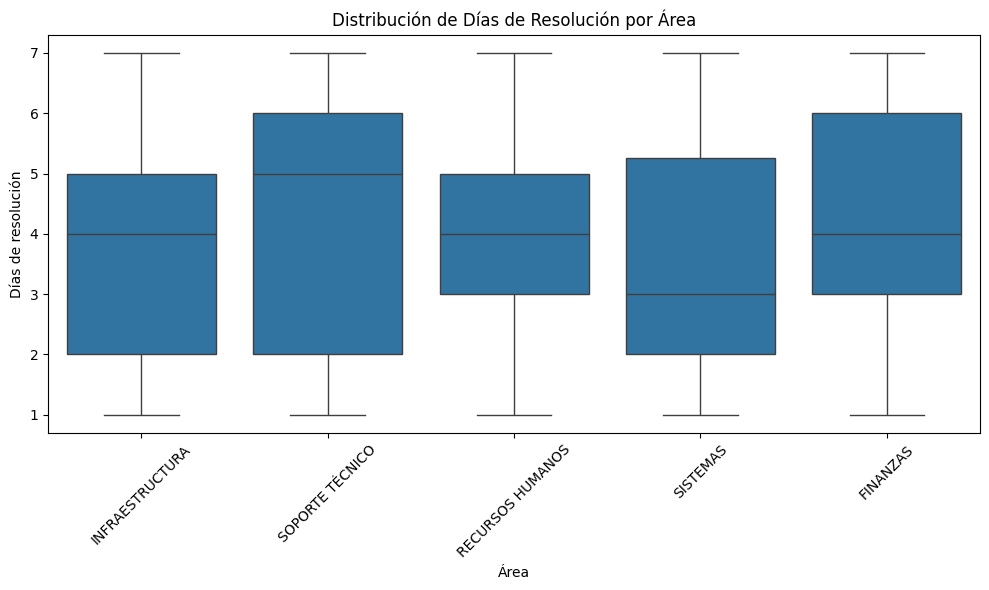

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Destino del reclamo', y='Dias de resolucion', data=df_filtrado)
plt.title("Distribución de Días de Resolución por Área")
plt.xlabel("Área")
plt.ylabel("Días de resolución")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dado el diagrama observamos que :


1.   No se observan datos a tipicos que se encuentre por fuera de los bigotes de las cajas
2.   Las medianas oscilan entre 3 y 5 siendo el área de sistemas la mas veloz para resolver y siendo soporte tecnico la mas lenta
3.  Soporte tecnico tiene una varianza mucho mas alta que las demas mientras que recursos humanos presenta la menor dispersion

y Dado que soporte tecnico tiene la mayor dispersion, la mediana mas alta en tiempos de resolucion y visto en graficos anteriores tambien la que presenta mas solicitudes de reclamos puede significar un punto critico o cuello de botella para la organizacion.



# Consigna 3

Realizar las medidas descriptivas de las variables en base a su tipo. Realizar los informes según sean los datos (simétricos o asimétricos).

**Analisis de variables categoricas.**

Se evaluara en las columnas 'Destino del reclamo', 'Quién lo resolvió', 'Tipo de reclamo' la frecuencia de cada categoría usando .value_counts() y la proporción usando .value_counts(normalize=True) * 100. También identificamos la moda.



In [ ]:
# Analizar 'Destino del reclamo'
print("\nAnálisis de 'Destino del reclamo':")
print("  - Cantidad por categoría:")
print(df['Destino del reclamo'].value_counts())
print("  - Proporción por categoría:")
print(df['Destino del reclamo'].value_counts(normalize=True) * 100)
print("  - Moda:", df['Destino del reclamo'].mode().tolist()) # Puede haber más de una moda


# Analizar 'Quién lo resolvió'
print("\nAnálisis de 'Quién lo resolvió':")
print("  - Cantidad por categoría:")
print(df['Quién lo resolvió'].value_counts())
print("  - Proporción por categoría:")
print(df['Quién lo resolvió'].value_counts(normalize=True) * 100)
print("  - Moda:", df['Quién lo resolvió'].mode().tolist())


# Analizar 'Tipo de reclamo'
print("\nAnálisis de 'Tipo de reclamo':")
print("  - Cantidad por categoría:")
print(df['Tipo de reclamo'].value_counts())
print("  - Proporción por categoría:")
print(df['Tipo de reclamo'].value_counts(normalize=True) * 100)
print("  - Moda:", df['Tipo de reclamo'].mode().tolist())


Análisis de 'Destino del reclamo':
  - Cantidad por categoría:


1.   Destino del reclamo: ......   Proporción por categoría:


*   SOPORTE TÉCNICO     114..................28.50 %
*   RECURSOS HUMANOS     82..................20.50 %
*   SISTEMAS             78...................19.50 %
*   INFRAESTRUCTURA      67...................  16.75 %
*   FINANZAS             59..................  14.75 %

 **Moda: ['SOPORTE TÉCNICO']**


2.    'Quién lo resolvió':...... Proporción por categoría:


*   JUAN PÉREZ          106 ............26.50 %
*   HELP DESK            81 ............ 20.25 %
*   SOPORTE NIVEL 1      79............. 19.75 %
*   ADMINISTRADOR TI     67 ............ 16.75 %
*   MARÍA LÓPEZ          67 ............. 16.75 %
*   Elemento de la lista  

  **Moda: ['JUAN PÉREZ']**

3.   'Tipo de reclamo':...... Proporción por categoría:


*   PROBLEMA DE ACCESO   114 ............28.50 %
*   SOLICITUD DE EQUIPO  82 ............ 20.50 %
*   ACTUALIZACIÓN
      DE SOFTWARE        78............. 19.50 %
*   ERROR DE SISTEMA     67 ............ 16.75 %
*   CONSULTA GENERAL     59 ............. 14.75 %
  
  **Moda: ['PROBLEMA DE ACCESO']**

  Conclusion: Se observa que el reclamo con mayor frecuencia es 'PROBLEMA DE ACCESO' para el area 'SOPORTE TÉCNICO'. Lo que se anticipa, que seria un punto crtitico a mejorar en esta empresa.

  Como potencial de  impacto: Se sugiere a la empresa abordar las causas fundamentales de los "PROBLEMAS DE ACCESO", ya que podría, potencialmente, reducir el número total de reclamos, liberando recursos en "SOPORTE TÉCNICO" y mejorando la satisfacción del usuario al hacer que los problemas de acceso sean menos frecuentes.




---

ANALISIS CUANTITATIVO


---




📊 Estadísticas de Grado de Satisfacción por Área:

                     Media  Mediana  Moda  Desviación estándar  Varianza  \
Destino del reclamo                                                        
FINANZAS              3.14      4.0   1.0                 1.68      2.83   
INFRAESTRUCTURA       2.75      3.0   1.0                 1.58      2.49   
RECURSOS HUMANOS      3.09      3.0   2.0                 1.42      2.02   
SISTEMAS              3.05      3.0   5.0                 1.54      2.39   
SOPORTE TÉCNICO       3.00      3.0   1.0                 1.51      2.27   

                     Rango  IQR  Asimetría (Skewness)  Curtosis  Mínimo   Q1  \
Destino del reclamo                                                            
FINANZAS               4.0  4.0                 -0.23     -1.65     1.0  1.0   
INFRAESTRUCTURA        4.0  3.0                  0.13     -1.53     1.0  1.0   
RECURSOS HUMANOS       4.0  2.0                  0.04     -1.33     1.0  2.0   
SISTEMAS       

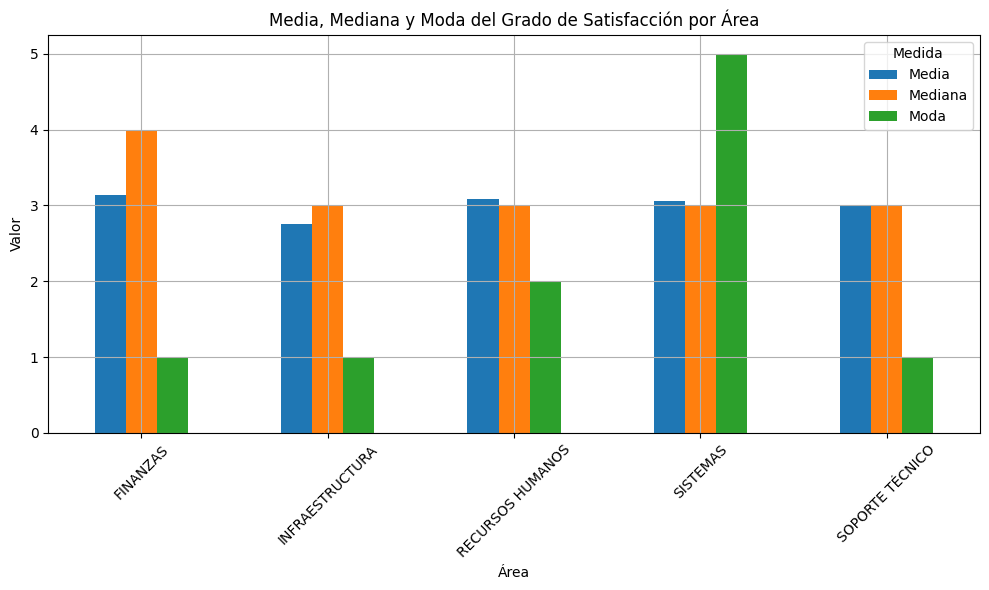

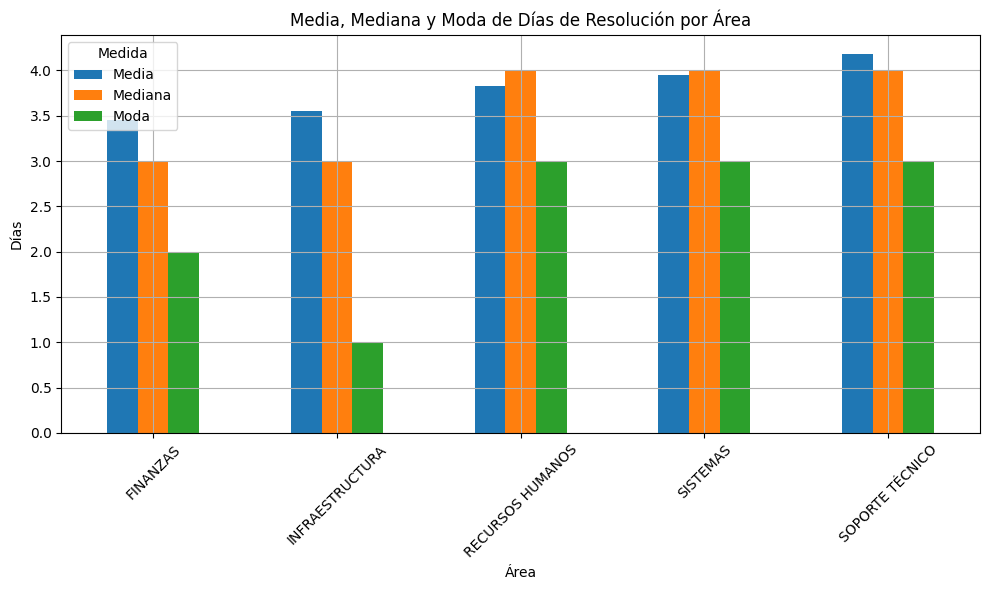

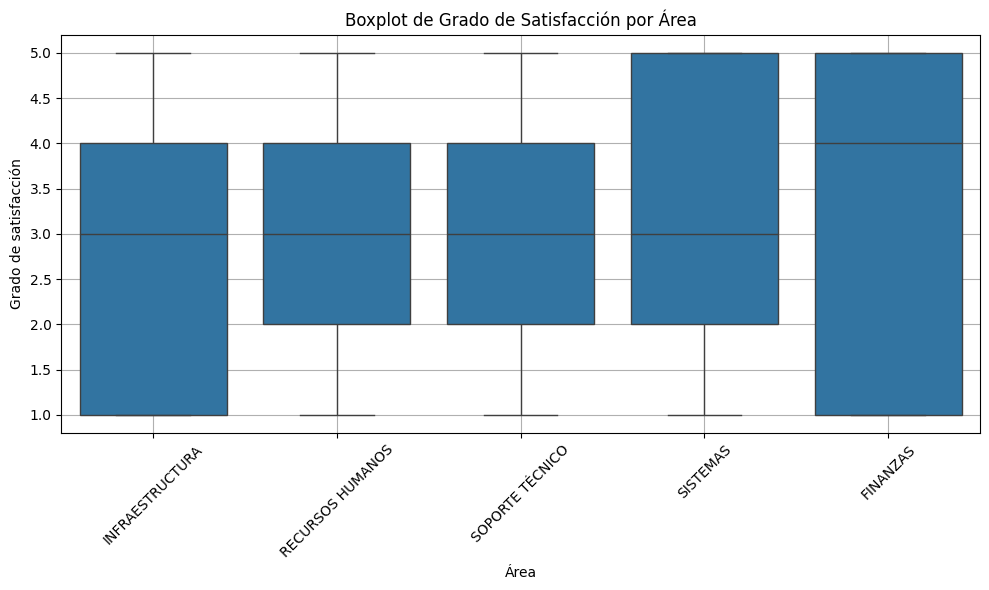

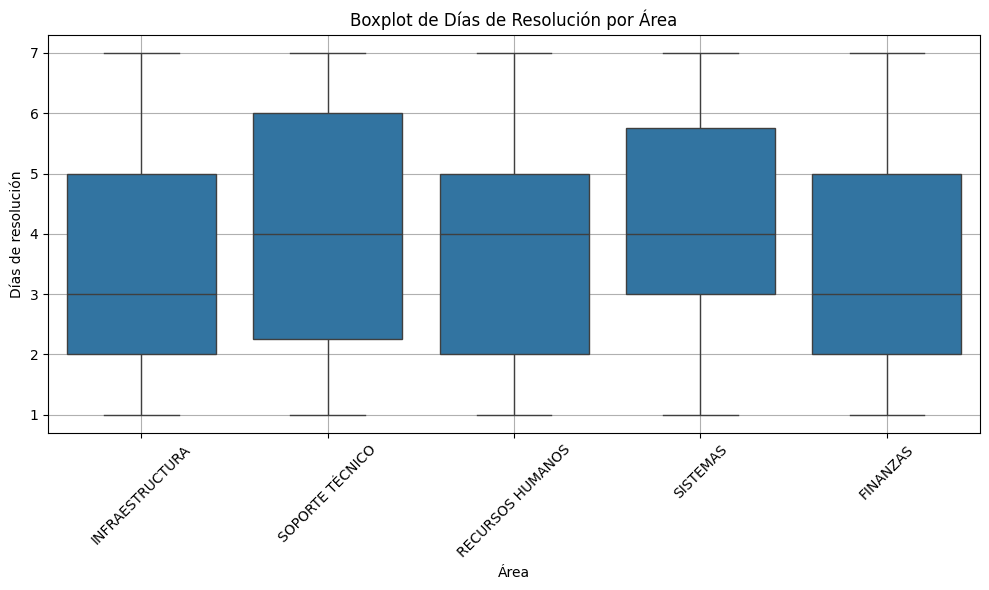

In [45]:
from scipy.stats import skew, kurtosis, mode

# Función de resumen estadístico
def resumen_estadistico(x):
    return pd.Series({
        "Media": x.mean(),
        "Mediana": x.median(),
        "Moda": mode(x, keepdims=False).mode if len(x) > 0 else np.nan,
        "Desviación estándar": x.std(),
        "Varianza": x.var(),
        "Rango": x.max() - x.min(),
        "IQR": x.quantile(0.75) - x.quantile(0.25),
        "Asimetría (Skewness)": skew(x),
        "Curtosis": kurtosis(x),
        "Mínimo": x.min(),
        "Q1": x.quantile(0.25),
        "Q2 (Mediana)": x.median(),
        "Q3": x.quantile(0.75),
        "Máximo": x.max()
    })


# Filtrar datos de satisfacción válidos
# Ya que con valor 0 significa que no completaron la encuesta
df_satisfaccion = df[df["Grado de satisfacción"] != 0]

# Estadísticas por Área para satisfacción
stats_satisfaccion = df_satisfaccion.groupby("Destino del reclamo")["Grado de satisfacción"].apply(resumen_estadistico).unstack()

print("\n📊 Estadísticas de Grado de Satisfacción por Área:\n")
print(stats_satisfaccion.round(2))

# Estadísticas por Área para días de resolución
df_resolucion = df[df["Dias de resolucion"].notna()]
stats_resolucion = df_resolucion.groupby("Destino del reclamo")["Dias de resolucion"].apply(resumen_estadistico).unstack()

print("\n📊 Estadísticas de Días de Resolución por Área:\n")
print(stats_resolucion.round(2))

#GRAFICOS DE BARRAS
stats_satisfaccion[['Media', 'Mediana', 'Moda']].plot(kind='bar', figsize=(10, 6))

plt.title('Media, Mediana y Moda del Grado de Satisfacción por Área')
plt.ylabel('Valor')
plt.xlabel('Área')
plt.xticks(rotation=45)
plt.legend(title='Medida')
plt.grid(True)
plt.tight_layout()
plt.show()

stats_resolucion[['Media', 'Mediana', 'Moda']].plot(kind='bar', figsize=(10, 6))

plt.title('Media, Mediana y Moda de Días de Resolución por Área')
plt.ylabel('Días')
plt.xlabel('Área')
plt.xticks(rotation=45)
plt.legend(title='Medida')
plt.grid(True)
plt.tight_layout()
plt.show()

#GRAFICOS DE CAJA

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_satisfaccion, x="Destino del reclamo", y="Grado de satisfacción")
plt.title("Boxplot de Grado de Satisfacción por Área")
plt.ylabel("Grado de satisfacción")
plt.xlabel("Área")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_resolucion, x="Destino del reclamo", y="Dias de resolucion")
plt.title("Boxplot de Días de Resolución por Área")
plt.ylabel("Días de resolución")
plt.xlabel("Área")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()